# Skewness and Kurtosis

## Skewness

> In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Skewness)

## Kurtosis

> In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes a particular aspect of a probability distribution. There are different ways to quantify kurtosis for a theoretical distribution, and there are corresponding ways of estimating it using a sample from a population. Different measures of kurtosis may have different interpretations.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Kurtosis)

## Formulas

- 1st moment -> mean
- 2nd moment -> variance
- 3rd moment -> skewness
- 4th moment -> kurtosis

$$\begin{align*}
skewness &= E\left[\left(\dfrac{X-\mu}{\sigma}\right)^3\right]\\
kurtosis &= E\left[\left(\dfrac{X-\mu}{\sigma}\right)^4\right]
\end{align*}$$

, where $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.

In general $p^{th}$ stadardized moment can be defined as follows

$$p^{th}\,standardized\,moment=E\left[\left(\dfrac{X-\mu}{\sigma}\right)^p\right]$$

## Skewness

- Measures symmetry
- Left-skewned means that the `left` tail is more prominent (skewness<0)
- Right-skewned means that the `right` tail is more prominent (skewness>0)
- **In finances we want to avoid negative skewness -> potential for large negative returns**

In [1]:
from scipy.stats import skewnorm
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Visualize the normal and skew-normal distributions
x = np.linspace(-5.0, 5.0, 1000)
y_pos = skewnorm.pdf(x, 10, loc=0.0, scale=1.0)
y_neg = skewnorm.pdf(x, -10, loc=0.0, scale=1.0)
y_norm = norm.pdf(x, loc=0.0, scale=1.0)

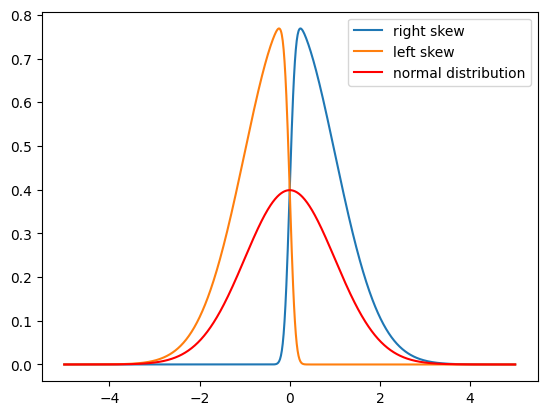

In [3]:
plt.plot(x, y_pos, label='right skew')
plt.plot(x, y_neg, label='left skew')
plt.plot(x, y_norm, label='normal distribution', color='red')
plt.legend()
plt.show();

## Kurtosis

- Measures how heavy the tails are
- Normal distribution has a kurtosis of 3
- Excess kurtosis = kurtosis - 3 (i.e. how different is the kurtosis from normal distribution's kurtosis)
- Kurtosis > 3, more tails than what a normal distribution has
- Kurtosis < 3, less tails that what a normal distribution has
- **In financial engineering kurtosis is related to risk**
  - **Kurtosis>3** means more risk, i.e. more potential for higher winnings and losses
  - **Kurtosis<3** means less risk, i.e. less potential for higher winnings and losses

normal distribution, kurtosis=3.05
t-distribution (df=2), kurtosis=150.05


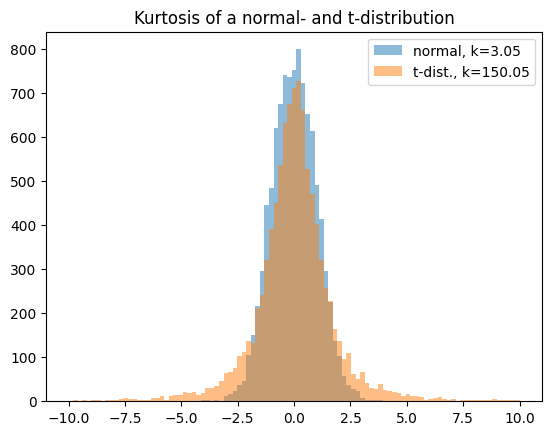

In [4]:
# This example calculates kurtosis for a normal-distribution and t-distribution with df (degrees of freedom) of 2.
from scipy.stats import t
from scipy.stats import kurtosis

# Normal-distribution
y_norm = norm.rvs(size=10000)
# t-distribution
y_t = t.rvs(size=10000, df=2, loc=0.0, scale=1.0)

# Calculate kurtosis for the normal-distribution
kurtosis_normal = kurtosis(y_norm, fisher=False, bias=True)
# Calculate kurtosis for the t-distribution
kurtosis_t = kurtosis(y_t, fisher=False, bias=True)

print(f'normal distribution, kurtosis={kurtosis_normal:0.2f}')
print(f't-distribution (df=2), kurtosis={kurtosis_t:0.2f}')

bins = np.linspace(-10, 10, 100)

plt.hist(y_norm, bins, alpha=0.5, label=f'normal, k={kurtosis_normal:0.2f}');
plt.hist(y_t, bins, alpha=0.5, label=f't-dist., k={kurtosis_t:0.2f}');
plt.title("Kurtosis of a normal- and t-distribution")
plt.legend()
plt.show();

# Real World Example

In [5]:
import opendatasets as od
import pandas as pd

In [6]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
df = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
df.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
sbux = df[df['Name'] == 'SBUX']
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [8]:
sbux.insert(len(sbux.columns), 'return', sbux['close'].pct_change(1))
sbux.head()

,date,open,high,low,close,volume,Name,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,-0.005015


In [9]:
print(f"Skewness: {sbux['return'].skew()}")

Skewness: -0.2680784195824153


In [10]:
print(f"Kurtosis: {sbux['return'].kurtosis()}")

Kurtosis: 5.593158903424731
